<a href="https://colab.research.google.com/github/AmiraBelkis/PFE-TEST/blob/main/MNIST/AG_ResNet18_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Rssrc

In [ ]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Sun Jul 30 14:44:52 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   43C    P8     9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('Not using a high-RAM runtime')
else:
  print('You are using a high-RAM runtime!')

Your runtime has 27.3 gigabytes of available RAM

You are using a high-RAM runtime!


# import

## Lib

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import random
import string
import torch
from torch import nn
import torch.nn.utils.prune as prune
import torch.nn.functional as F
import torch.optim as optim
from torch.optim import lr_scheduler
import torch.backends.cudnn as cudnn
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import time
import os
import copy
import matplotlib.colors as colors
import numpy as np
from copy import deepcopy

In [ ]:
import AG

100%|██████████| 9912422/9912422 [00:00<00:00, 265652706.92it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw


100%|██████████| 28881/28881 [00:00<00:00, 22020667.85it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 120934677.40it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw




100%|██████████| 4542/4542 [00:00<00:00, 19803044.46it/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [ ]:
import importlib
import global_param
importlib.reload(global_param)
importlib.reload(AG)

<module 'AG' from '/content/AG.py'>

# AG

In [ ]:
model_path = '/content/drive/Shareddrives/PFE 22 23 Feliachi et Frioui/..Tests/Models/MNIST/resnet18_mnist'
model_base = torch.load(model_path)

In [ ]:
AG.evaluation_2(model_base , nn.CrossEntropyLoss())

Accuracy: 94.31%
Loss: 0.2143


(0.9431, 0.2143256761086215)

In [ ]:
save_to = '/content/drive/Shareddrives/PFE 22 23 Feliachi et Frioui/..Tests/MNIST/ResNet18/'
os.makedirs(save_to, exist_ok=True)
os.makedirs(save_to +'children/', exist_ok=True)
os.makedirs(save_to +'parents/', exist_ok=True)
os.makedirs(save_to +'kd/', exist_ok=True)
os.makedirs(save_to +'kd/training/', exist_ok=True)

Generating the initial population :
     - individual 0 ----------- 100%
     - individual 1 ----------- 100%
     - individual 2 ----------- 100%
     - individual 3 ----------- 100%
     - individual 4 ----------- 100%
     - individual 5 ----------- 100%
     - individual 6 ----------- 100%
     - individual 7 ----------- 100%
Performing KD on the initial population :
------------------------------ Training 1 ---------------------------------
Epoch 0/4
----------
train Loss: 0.6961 Acc: 0.8077
val Loss: 0.4256 Acc: 0.9739

Epoch 1/4
----------
train Loss: 0.4045 Acc: 0.9736
val Loss: 0.3785 Acc: 0.9760

Epoch 2/4
----------
train Loss: 0.3781 Acc: 0.9764
val Loss: 0.3696 Acc: 0.9810

Epoch 3/4
----------
train Loss: 0.3651 Acc: 0.9782
val Loss: 0.3428 Acc: 0.9827

Epoch 4/4
----------
train Loss: 0.3571 Acc: 0.9791
val Loss: 0.3439 Acc: 0.9819

Training complete in 26m 44s
Best val Acc: 0.982700
------------------------------ Training 2 ---------------------------------
Epoch 0/4
--

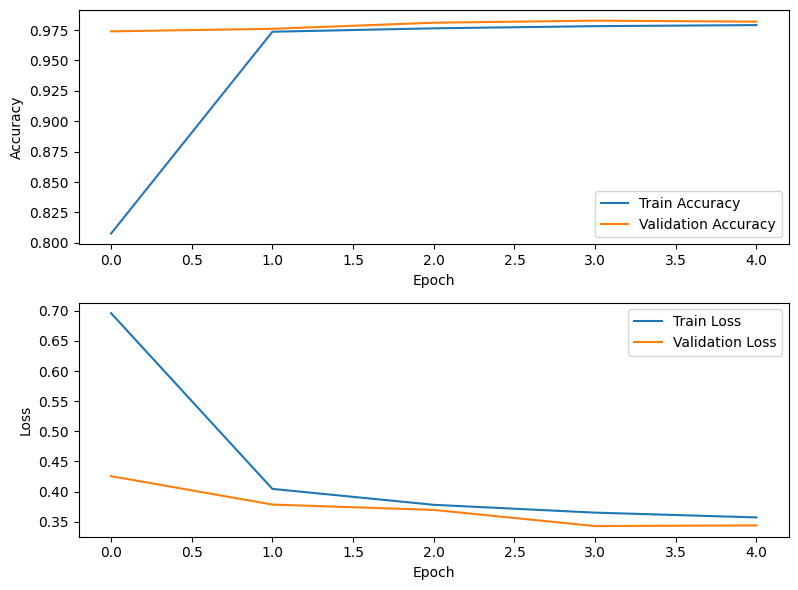

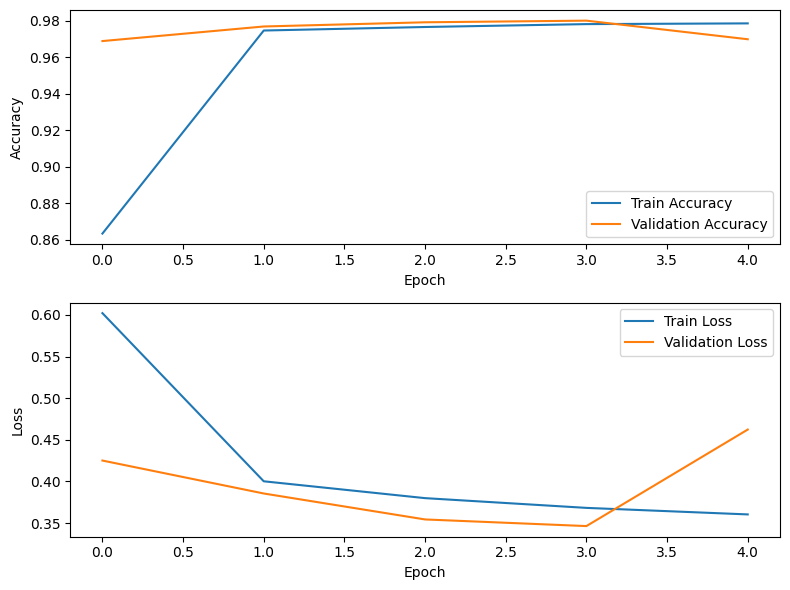

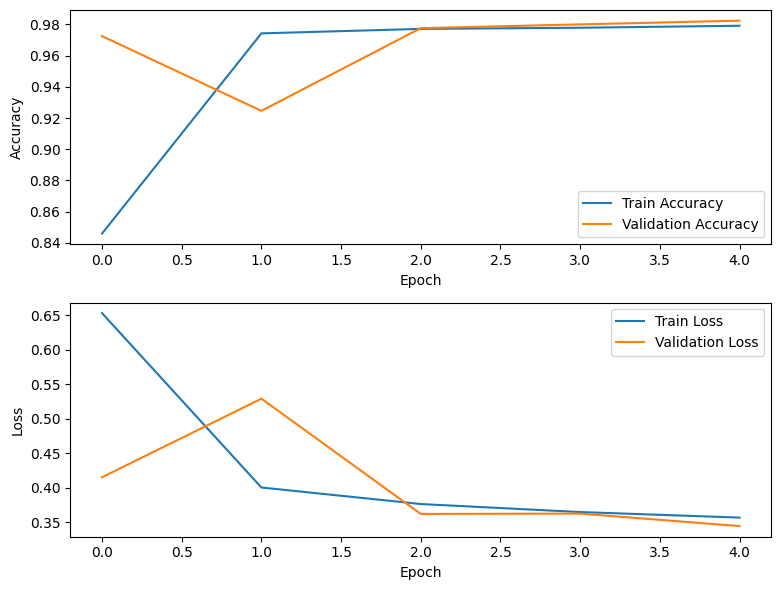

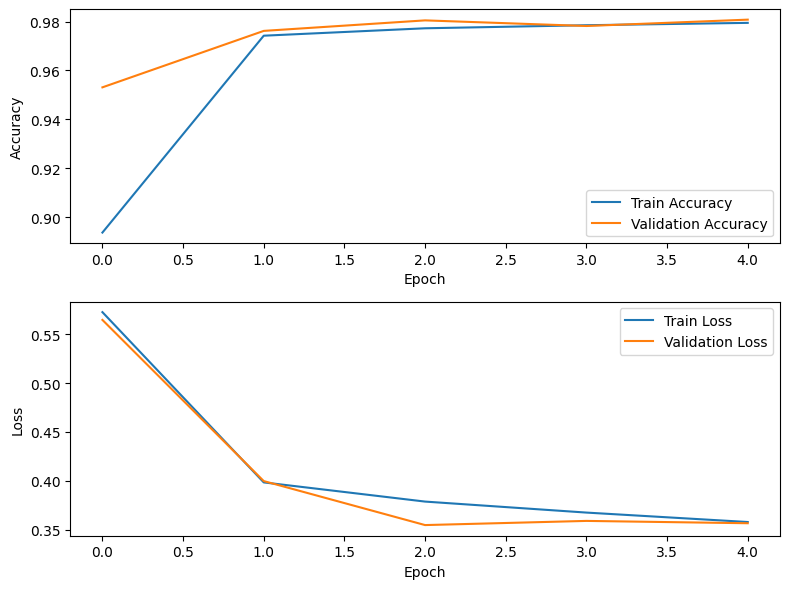

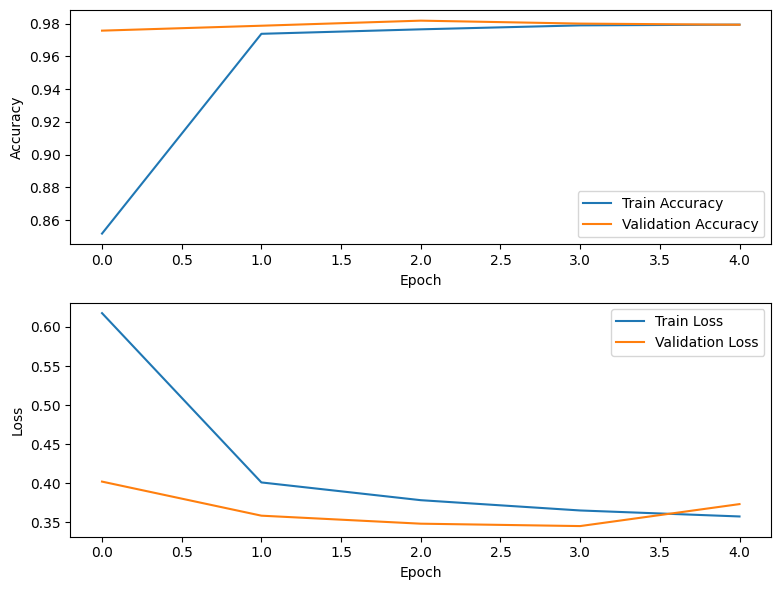

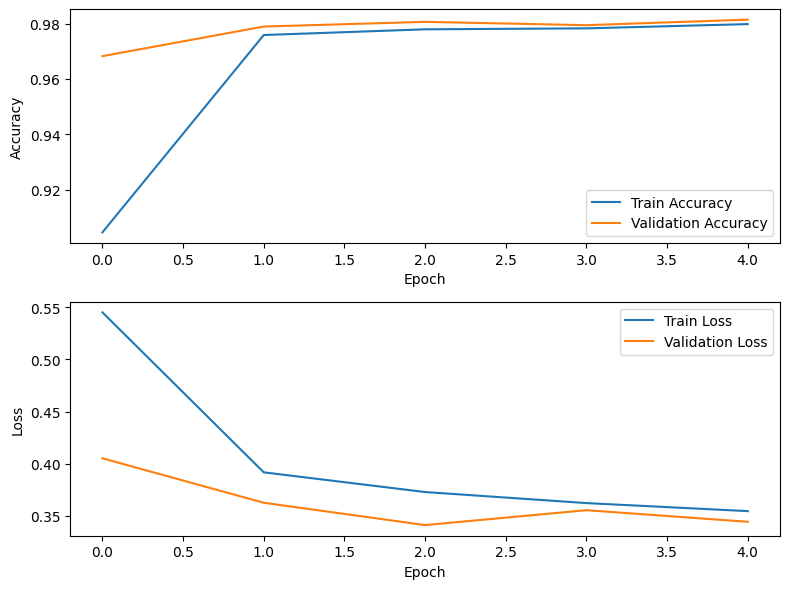

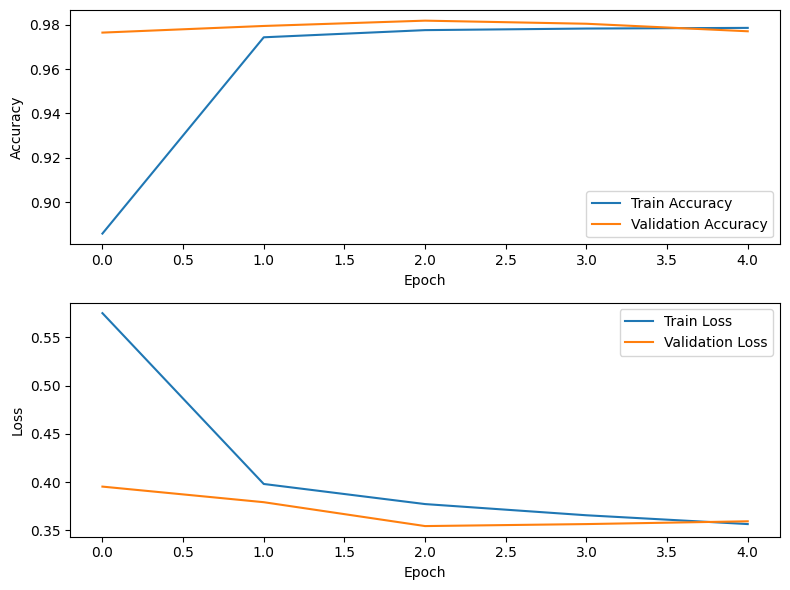

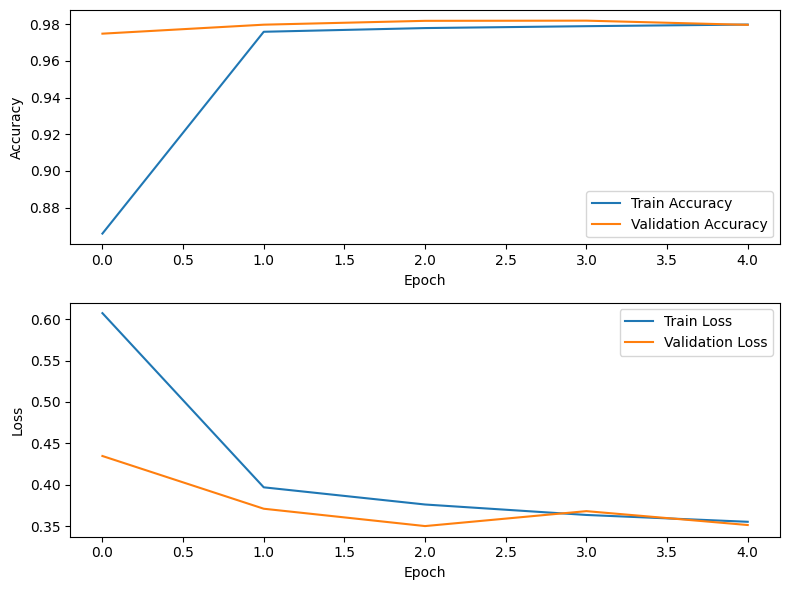

/*-----------------------------*/
/*         iteration 1        */
/*----------------------------*/
   * Select parent for crossing:
       - Selection --------------- 100%
   * Offspring:
       - Crossover:
           mask : [0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1]
       - Crossover:
           mask : [0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0]
       - Performing KD on the children :
------------------------------ Training 1 ---------------------------------
Epoch 0/4
----------
train Loss: 0.4602 Acc: 0.9552
val Loss: 0.4380 Acc: 0.9735

Epoch 1/4
----------
train Loss: 0.3871 Acc: 0.9757
val Loss: 0.3636 Acc: 0.9796

Epoch 2/4
----------
train Loss: 0.3717 Acc: 0.9782
val Loss: 0.3479 Acc: 0.9825

Epoch 3/4
----------
train Loss: 0.3610 Acc: 0.9793
val Loss: 0.4082 Acc: 0.9766

Epoch 4/4
----------
train Loss: 0.3525 Ac

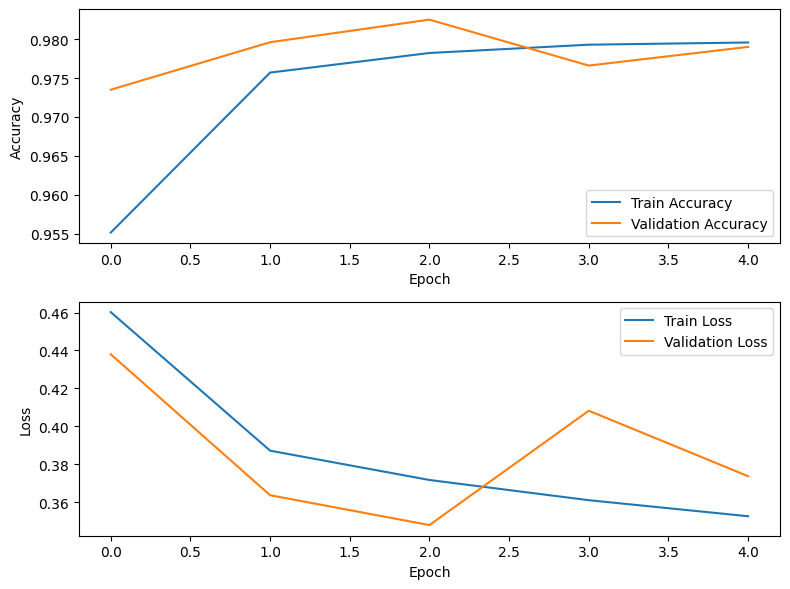

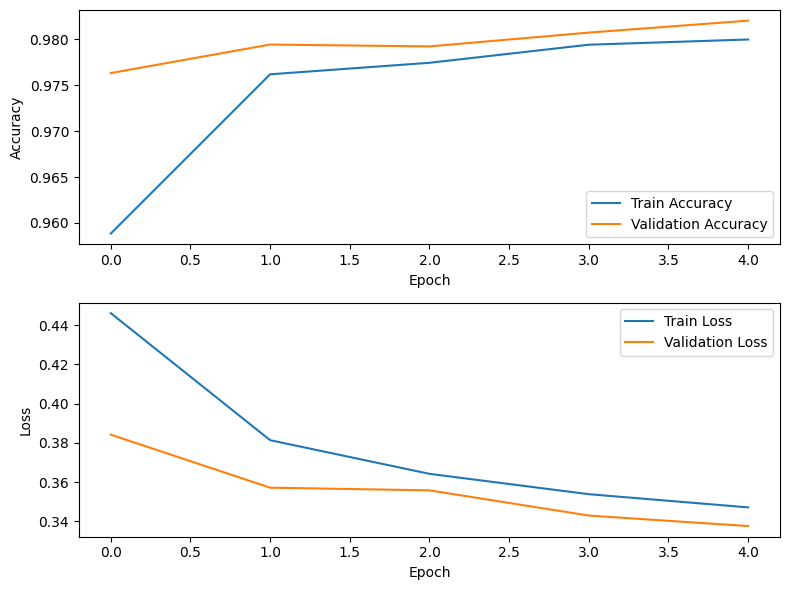

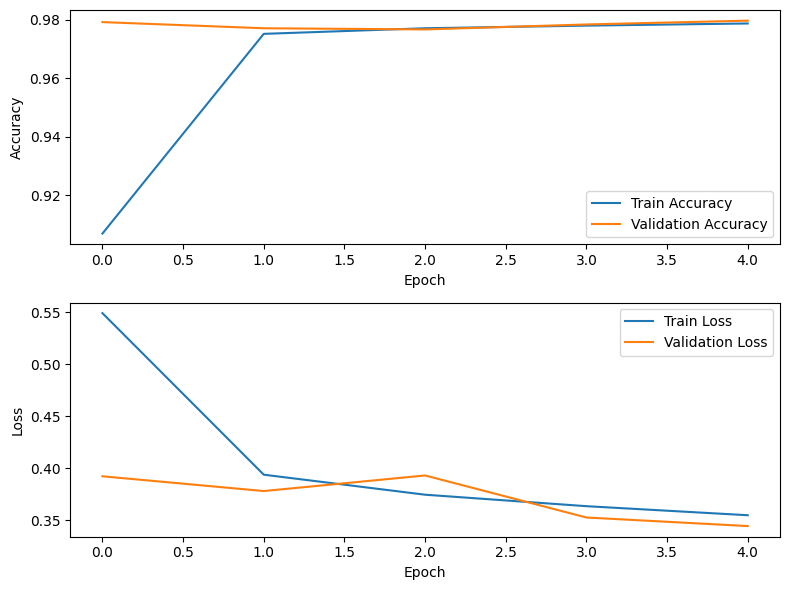

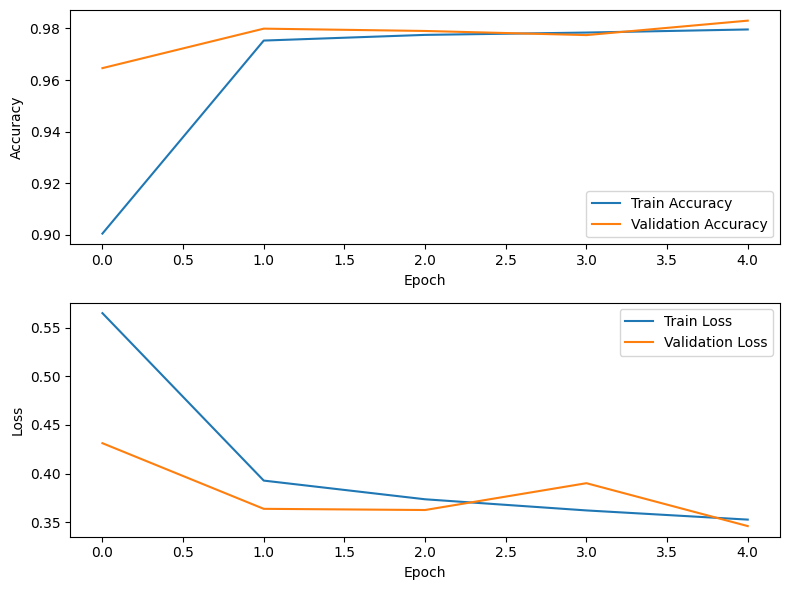

Select the winning ticket from final population
  - Selection --------------- 100%


In [ ]:
winning_ticket = AG.AG_method(model_base, save_to, nb_itr = 2, N = 8 ,pruning_rate = 0.85, pruning_space = 0.05,kd_epoch = 5)

## Evaluate the winning ticket

In [ ]:
winning_ticket = torch.load( save_to + 'winning_ticket')

In [ ]:
AG.calculate_sparsity(winning_ticket)

tensor(0.8557, device='cuda:0')

In [ ]:
AG.evaluation_2(winning_ticket, nn.CrossEntropyLoss())

Accuracy: 98.25%
Loss: 0.1130


(0.9825, 0.1130258630795084)

In [ ]:
data = AG.dataloaders['val']
for in_ , lbl in data:
  in_ = in_.to(AG.device)
  lbl = lbl.to(AG.device)
  out = winning_ticket(in_)
  _, preds = torch.max(out, 1)
  print(preds)
  print('-'*10)
  print(lbl)
  print('-'*10)
  print(preds-lbl)
  break

tensor([9, 7, 7, 7, 7, 3, 5, 2, 4, 8, 0, 8, 9, 9, 1, 8, 3, 7, 7, 5, 5, 7, 5, 8,
        0, 7, 4, 3, 1, 7, 4, 6, 7, 1, 7, 7, 1, 5, 1, 0, 8, 0, 1, 5, 9, 0, 1, 2,
        6, 7, 8, 0, 5, 0, 2, 4, 4, 8, 2, 8, 9, 2, 5, 6], device='cuda:0')
----------
tensor([4, 7, 7, 7, 7, 3, 5, 2, 4, 8, 0, 8, 9, 9, 1, 8, 3, 7, 7, 5, 5, 1, 5, 8,
        0, 7, 4, 9, 1, 7, 4, 6, 7, 1, 7, 7, 1, 5, 1, 0, 8, 0, 1, 5, 9, 0, 1, 2,
        6, 7, 8, 0, 5, 0, 2, 4, 4, 8, 2, 8, 9, 2, 5, 6], device='cuda:0')
----------
tensor([ 5,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  6,  0,  0,  0,  0,  0, -6,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0], device='cuda:0')
